In [1]:
import pandas as pd

df= pd.read_csv(r"C:\Users\saqla\Desktop\Python Certification for Data Science\In Class Practice Codes\6. Module 6\D6_Sessions_practise\insurance.csv")

df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df[['sex', 'smoker']].describe()

,sex,smoker
count,1338,1338
unique,2,2
top,male,no
freq,676,1064


In [2]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from scipy import stats
from statsmodels.compat import lzip
import statsmodels
import matplotlib.pyplot as plt

## get_dummies will convert categorical columns like sex, smoker and region into numerical or binary data (0's and 1's) coz the machine does not understand string data .This increases the number of columns i.e the no. of independant variables which will help to improve the accuracy of the model.

In [2]:
df= pd.get_dummies(df)

In [3]:
df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [6]:
# Dropping the extra dummy variables that are not needed
df.drop(['sex_male' , 'smoker_no'], axis=1 ,inplace= True)
df.describe()

,age,bmi,children,charges,sex_female,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.494768,0.204783,0.242152,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694,0.428546,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Checking for Linearity
### Before you execute a linear regression model you may want to check that a linear relationship exists between the dependent variable and the independent variable/s. This can be done using a scatter plot/pairplot.

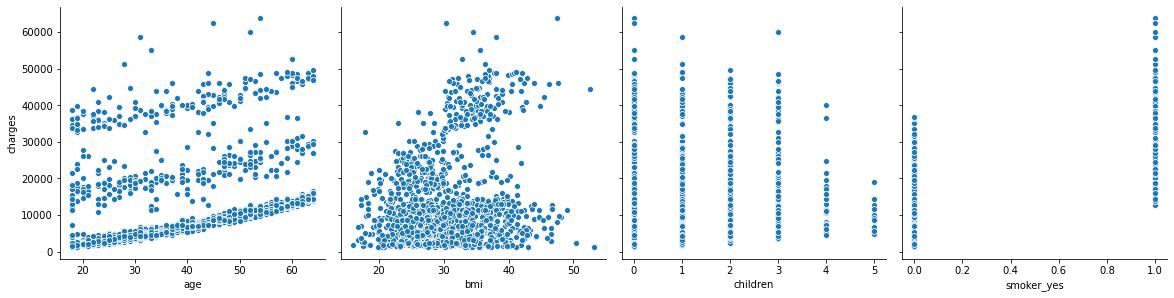

In [22]:
# visualize the relationship between the features and the response using scatterplots
import seaborn as sns
p = sns.pairplot(df, x_vars=['age','bmi','children','smoker_yes'], y_vars='charges',height=4,aspect=1)

## Check for Multicolinearity between independant variables and also to see which independant variables have an impact on our output variable using correlation matrix. This activity can be done before building the model itself.

In [7]:
corrmat = df.corr()
corrmat
# Output variable is "charges"
# Examle for correlation is age vs experience. If age increases exp also increases i.e they are highly correlated.
#There are no strong correlations between the IVs meaning there is no need to worry about multicollinearity.
# Charges are impacted/affected by age, bmi, smoker_yes (children and region  have a very less impact)

,age,bmi,children,charges,sex_female,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,0.020856,-0.025019,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,-0.046371,0.003750,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,-0.017163,0.007673,-0.022808,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,-0.057292,0.787251,0.006349,-0.039905,0.073982,-0.043210
sex_female,0.020856,-0.046371,-0.017163,-0.057292,1.000000,-0.076185,0.002425,0.011156,-0.017117,0.004184
smoker_yes,-0.025019,0.003750,0.007673,0.787251,-0.076185,1.000000,0.002811,-0.036945,0.068498,-0.036945
region_northeast,0.002475,-0.138156,-0.022808,0.006349,0.002425,0.002811,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,0.011156,-0.036945,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270025,-0.023066,0.073982,-0.017117,0.068498,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.006205,0.021914,-0.043210,0.004184,-0.036945,-0.320177,-0.320829,-0.346265,1.000000


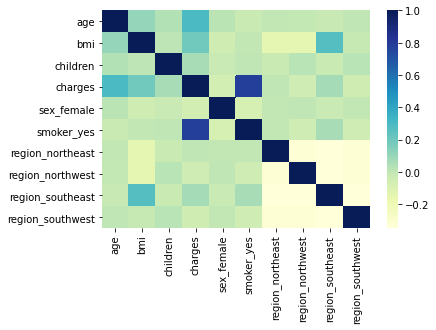

In [35]:
import seaborn as sns

sns.heatmap(corrmat,cmap='YlGnBu')

## Build Model

In [9]:
# Ordinary Least Squares Method
model = smf.ols("charges ~ age + bmi + sex_female + smoker_yes + children + region_northwest + region_southeast + region_southwest", data= df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Sat, 22 May 2021   Prob (F-statistic):               0.00
Time:                        13:22:05   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.207e+04    999.649    -12.074      0.000    -1.4e+04   -1.01e+04
age                256.8564     11.899     21.587      0.000     233.514     280.199
bmi                339.1935     28.599     11.860      0.000     283.088     395.298
sex_female         131.3144    332.945      0.394      0.693    -521.842     784.470
smoker_yes        2.385e+04    413.153     57.723      0.000     2.3e+04    2.47e+04
children           475.5005    137.804      3.451      0.001     205.163     745.838
region_northwest  -352.9639    476.276     -0.741      0.459   -1287.298     581.370
region_southeast -1035.0220    478.692     -2.162      0.031   -1974.097     -95.947
region_southwest  -960.0510    477.933     -2.009      0.045   -1897.636     -22.466
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         315.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 1.Adjusted. R-squared reflects the fit of the model. R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
## 2.P >|t| is your p-value. A p-value of less than 0.05 is considered to be statistically significant.
## 3.Confidence Interval represents the range in which our coefficients are likely to fall (with a likelihood of 95%)

## Some notes on the Durbin-Watson test (checks Autocorrelation):
### the test statistic always has a value between 0 and 4
### value of 2 means that there is no autocorrelation in the sample
### values < 2 indicate positive autocorrelation, values > 2 negative one.

In [10]:
statsmodels.stats.stattools.durbin_watson(model.resid)
#Given the statistical value of 2.09, the test provides evidence that there is 
#no serial correlation present meaning the residual error terms are uncorrelated and are independent.

2.088422998667309

## Mean of the Residuals

In [24]:
np.mean(model.resid)

5.193228341962011e-13

In [11]:
#Assumption of Normality of the Residuals
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(model.resid)
lzip(name, test)
#The test is significant; meaning the data violates the assumption of normality of the residuals

[('Jarque-Bera', 718.8872635707911),
 ('Chi^2 two-tail prob.', 7.863468661820641e-157),
 ('Skew', 1.2112110051671854),
 ('Kurtosis', 5.650794298374031)]

In [23]:
import numpy as np

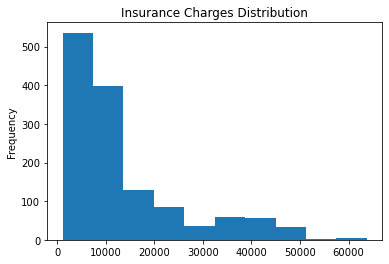

In [30]:
df['charges'].plot(kind='hist', 
                       title= 'Insurance Charges Distribution')
#The data follows more of a skewed normal distribution.

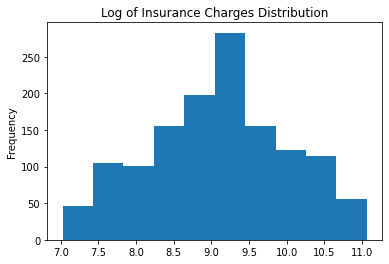

In [31]:
#A common way to correct this would be to take the log transformation of the DV and use it in the model.
df['charges_log'] = np.log(df['charges'])
df['charges_log'].plot(kind='hist', 
                       title= 'Log of Insurance Charges Distribution')

## Checking for Miltivariate Normality (QQ Plot)

Text(0.5, 1.0, 'Model1 Residuals Q-Q Plot')

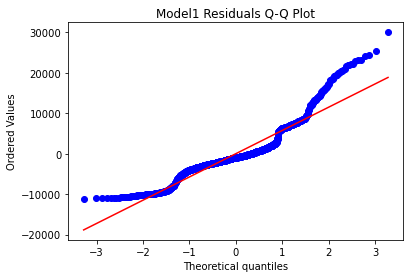

In [12]:
#You can see how it transforms the data into more of a normal distribution which would likely change the residuals as well. 
#One should test this for each variable’s residuals to find the culprit and decide what to do. 
#The best way to graphically check for normality is to use a Q-Q plot. A Q-Q plot of the model’s residuals is below.
#The data points (blue) should be on the red line. If not, then it indicates non-normality.

#Running plot & giving it a title
stats.probplot(model.resid, dist="norm", plot= plt)
plt.title("Model1 Residuals Q-Q Plot")

In [19]:
#Saving plot as a png
plt.savefig("Model1_Resid_qqplot.png")

<Figure size 432x288 with 0 Axes>

In [32]:
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)
lzip(name, test)
#The test is significant meaning the data violates the assumption of homoscedasticity, 
#i.e. heteroscedasticity is present in the data. What to do? Either one can transform the variables to improve the model, 
#or use a robust regression method that accounts for the heteroscedasticity.

[('Lagrange multiplier statistic', 121.74360137568972),
 ('p-value', 1.446717553918268e-22),
 ('f-value', 16.628612027375375),
 ('f p-value', 1.1456058246341032e-23)]

In [21]:
#Linear Regression Model

model = smf.ols("charges ~ age + bmi + sex_female + smoker_yes + children + region_northwest + region_southeast + region_southwest", data= df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Wed, 03 Oct 2018   Prob (F-statistic):               0.00
Time:                        21:38:15   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.207e+04    999.649    -12.074      0.000    -1.4e+04   -1.01e+04
age                256.8564     11.899     21.587      0.000     233.514     280.199
bmi                339.1935     28.599     11.860      0.000     283.088     395.298
sex_female         131.3144    332.945      0.394      0.693    -521.842     784.470
smoker_yes        2.385e+04    413.153     57.723      0.000     2.3e+04    2.47e+04
children           475.5005    137.804      3.451      0.001     205.163     745.838
region_northwest  -352.9639    476.276     -0.741      0.459   -1287.298     581.370
region_southeast -1035.0220    478.692     -2.162      0.031   -1974.097     -95.947
region_southwest  -960.0510    477.933     -2.009      0.045   -1897.636     -22.466
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         315.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#In order to account for the heteroscedasticity in the data, one has to select a heteroscedasticity consistent covariance 
#matrix (HCCM) and pass it in the “cov_type=” argument apart of the .fit() method. 
#What is HCCM? Belwo is a nice read if interested more on this. There are a few HCCMs to choose from:
#http://www.indiana.edu/~jslsoc/files_research/testing_tests/hccm/00TAS.pdf
#HC0, not good on sample size ≤ 250
#HC1, not good on sample size ≤ 250
#HC2, good on sample size ≤ 250
#HC3, which out performs HC0, HC1, and HC2 when sample size ≤ 250
#Little difference in performance when sample is ≥ 500

In [32]:
model3 = smf.ols("charges ~ age + bmi + sex_female + smoker_yes + children + region_northwest + region_southeast + region_southwest", data= df).fit(cov_type='HC3')

model3.summary()
#There are differences in the models and their results. Accounting for the heteroscedasiticity has altered the 
#F-statistics, the standard errors, 
#and etc. The second model ran, model3, is a better model.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     298.4
Date:                Sat, 22 May 2021   Prob (F-statistic):          2.25e-290
Time:                        14:35:03   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:                  HC3                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.207e+04   1062.898    -11.356      0.000   -1.42e+04   -9986.611
age                256.8564     11.961     21.474      0.000     233.412     280.300
bmi                339.1935     31.879     10.640      0.000     276.711     401.676
sex_female         131.3144    334.971      0.392      0.695    -525.217     787.846
smoker_yes        2.385e+04    578.079     41.255      0.000    2.27e+04     2.5e+04
children           475.5005    131.009      3.630      0.000     218.727     732.274
region_northwest  -352.9639    486.616     -0.725      0.468   -1306.714     600.786
region_southeast -1035.0220    503.426     -2.056      0.040   -2021.718     -48.326
region_southwest  -960.0510    463.014     -2.073      0.038   -1867.541     -52.561
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         315.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""